In [1]:
%matplotlib inline

In [47]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vtk_rw import read_vtk
from ply_rw import read_ply
import lmfit
import pandas as pd

In [3]:
colors = sns.color_palette('cubehelix', 10)

### Load data

In [60]:
hemi='lh'

mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/%s_lowres_new.vtk'%hemi
sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/%s_sulc.npy'%hemi
mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/%s_fullmask.npy'%hemi
embed_file='/scr/ilz3/myelinconnect/new_groupavg/embed/connectivity/%s_smooth_3_embed.npy'%hemi
myethick_file = '/scr/ilz3/myelinconnect/new_groupavg/myethick/myethick/%s_myethick.npy'%hemi
myeratio_file = '/scr/ilz3/myelinconnect/new_groupavg/myethick/myeratio/%s_myeratio.npy'%hemi

In [59]:
v,f,d = read_vtk(mesh_file)
mask = np.load(mask_file)
#embedding = np.load(embed_file)
myethick = np.load(myethick_file)
myeratio = np.load(myeratio_file)
sulc = np.load(sulc_file)

### Mask

In [7]:
myethick[mask]=0
myeratio[mask]=0

In [9]:
scatter_myethick = np.delete(myethick, mask)
scatter_myeratio = np.delete(myeratio, mask)

#scatter_embed = np.delete(embedding, mask, axis=0)

#t1_idx=np.where(scatter_t1avg<=1500)
#scatter_t1avg = np.delete(scatter_t1avg, t1_idx)
#scatter_embed_t1 = np.delete(scatter_embed_t1, t1_idx, axis=0)

#r1_idx=np.where(scatter_r1avg>(1./1500))
#scatter_r1avg = np.delete(scatter_r1avg, r1_idx)
#scatter_embed_r1 = np.delete(scatter_embed_r1, r1_idx, axis=0)

In [35]:
myethick_plot = np.copy(myethick)
myethick_plot -= np.mean(scatter_myethick)
myethick_plot[mask] = 0

myeratio_plot = np.copy(myeratio)
myeratio_plot -= np.mean(scatter_myeratio)
myeratio_plot[mask] = 0

### Plot brains

In [29]:
from plotting import plot_surf_stat_map, crop_img

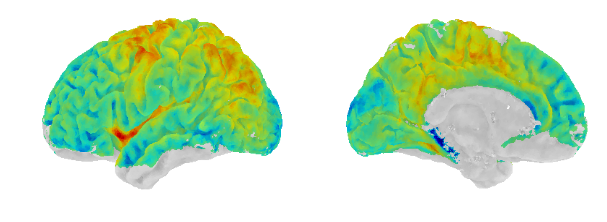

In [36]:
sns.set_style('white')
lat=plot_surf_stat_map(v, f, stat_map=myethick_plot, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9), cmap='jet', threshold=1e-50)
sns.set_style('white')
med=plot_surf_stat_map(v, f, stat_map=myethick_plot, bg_map=sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), cmap='jet', threshold=1e-50)

lat_crop=crop_img(lat)
med_crop=crop_img(med)
fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

In [37]:
sns.set_style('white')
lat=plot_surf_stat_map(v, f, stat_map=myeratio_plot, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9), cmap='jet', threshold=1e-50)
sns.set_style('white')
med=plot_surf_stat_map(v, f, stat_map=myeratio_plot, bg_map=sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), cmap='jet', threshold=1e-50)

lat_crop=crop_img(lat)
med_crop=crop_img(med)
fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

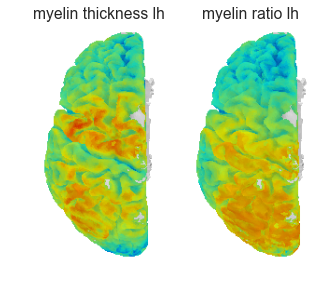

In [46]:
sns.set_style('white')
thick=plot_surf_stat_map(v, f, stat_map=myethick_plot, bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                    elev=270,azim=90, figsize=(10,8),cmap='jet', threshold=1e-50)

ratio=plot_surf_stat_map(v, f, stat_map=myeratio_plot, bg_map=sulc, bg_on_stat=True,darkness=0.5,
        elev=270,azim=90, figsize=(10,8), cmap='jet',  threshold=1e-50)

thick_crop=crop_img(thick)
ratio_crop=crop_img(ratio)
fig=plt.figure()
fig.set_size_inches(5, 5)
ax1 = fig.add_subplot(121)
plt.imshow(thick_crop)
plt.title('myelin thickness %s'%hemi)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(ratio_crop)
plt.title('myelin ratio %s'%hemi)
ax2.set_axis_off()

### Plot 2D histogramms

In [10]:
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.3)

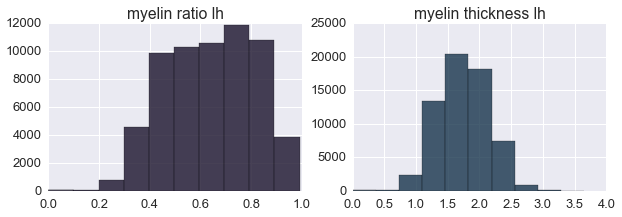

In [26]:
fig = plt.figure(figsize=(10,3))
fig.add_subplot(121)
plt.hist(scatter_myeratio, alpha=0.8, color=colors[0]);
plt.title('myelin ratio %s'%hemi)
fig.add_subplot(122)
plt.hist(scatter_myethick, alpha=0.8, color=colors[1]);
plt.title('myelin thickness %s'%hemi)

In [10]:
g = sns.jointplot(scatter_embed_t1[:,0], scatter_t1avg, kind="hex", size=6, color=colors[0])
g.set_axis_labels('FC', 'T1', fontsize=16)

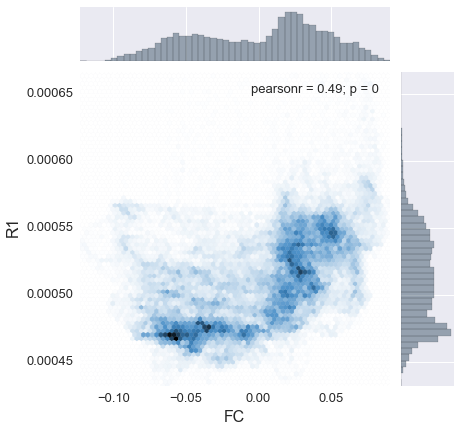

In [11]:
g = sns.jointplot(scatter_embed_r1[:,0], scatter_r1avg, kind="hex", size=6, color=colors[1])
g.set_axis_labels('FC', 'R1', fontsize=16)

### Normalize data to get sensible model comparison

"Note that the calculation of chi-square and reduced chi-square assume that the returned residual function is scaled properly to the uncertainties in the data. For these statistics to be meaningful, the person writing the function to be minimized must scale them properly."

Is this valid, given the data are not normally distributed? 

In [12]:
t1_norm = (scatter_t1avg - np.mean(scatter_t1avg)) / (np.std(scatter_t1avg))
r1_norm = (scatter_r1avg - np.mean(scatter_r1avg)) / (np.std(scatter_r1avg))
embed1_t1_norm = (scatter_embed_t1[:,0] - np.mean(scatter_embed_t1[:,0])) / (np.std(scatter_embed_t1[:,0]))
embed1_r1_norm = (scatter_embed_r1[:,0] - np.mean(scatter_embed_r1[:,0])) / (np.std(scatter_embed_r1[:,0]))

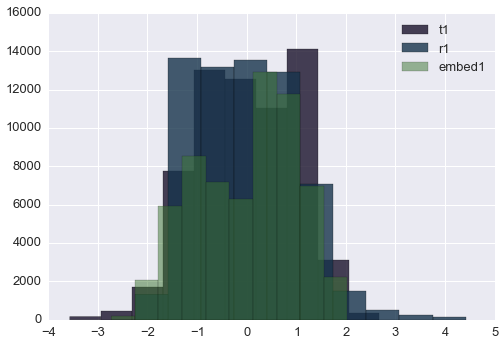

In [13]:
plt.hist(t1_norm, alpha=0.8, color=colors[0], label='t1');
plt.hist(r1_norm, alpha=0.8, color=colors[1], label='r1');
#plt.hist(embed1_t1_norm, alpha=0.7, color=colors[2], label='embed1_t1');
plt.hist(embed1_r1_norm, alpha=0.5, color=colors[3], label='embed1');
plt.legend()

### Model

In [14]:
def custom_plot(x, y, res, xlabel=None, ylabel=None, data_color=colors[1]):
    fig=plt.figure(figsize=(12,5))
    fig.add_subplot(121)
    plt.plot(x, y, alpha=0.1, marker='.', linestyle='None', color=data_color)
    plt.plot(x, res.best_fit, color='black', linestyle='None', marker='.', markersize=.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig.add_subplot(122)
    res.plot_residuals(data_kws={'alpha':0.1, 'color':'grey', 'marker':'.'}, fit_kws={'color':'k', 'linewidth':2})
    
def custom_report(res, label):
    print '##### %s #####'%label
    print res.fit_report()
    print 'BIC', res.bic
    print 'AIC', res.aic
    print ''

In [15]:
def fit_simple(model, x, y, t1type, xlabel, ylabel, color):
    
    pars = model.guess(y, x=x)
    out = model.fit(y, pars, x=x)
    
    custom_report(out, t1type)
    custom_plot(x,y, out, xlabel=xlabel, ylabel=ylabel, data_color=color)
    
    return out

In [16]:
def fit_composite_const(model, x, y, t1type, xlabel, ylabel, color):
    
    const_model = lmfit.models.LinearModel(prefix='const_')
    const_model.set_param_hint(name='slope', value=0, vary=False)
    comp_model = model + const_model
    
    pars = const_model.make_params(intercept=y.min())
    pars += model.guess(y, x=x)
    out = comp_model.fit(y, pars, x=x)
    
    custom_report(out, t1type)
    custom_plot(x,y, out, xlabel=xlabel, ylabel=ylabel, data_color=color)
    
    return out

### Linear fit

##### T1avg #####
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 5
    # data points      = 64304
    # variables        = 2
    chi-square         = 48225.664
    reduced chi-square = 0.750
[[Variables]]
    slope:      -0.50003632 +/- 0        (0.00%) (init=-0.5000363)
    intercept:   1.0438e-15 +/- 0        (0.00%) (init= 1.043752e-15)
[[Correlations]] (unreported correlations are <  0.100)

BIC -18478.0794234
AIC -18496.2221777

##### R1avg #####
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 5
    # data points      = 64113
    # variables        = 2
    chi-square         = 48568.352
    reduced chi-square = 0.758
[[Variables]]
    slope:       0.49239926 +/- 0        (0.00%) (init= 0.4923993)
    intercept:   1.4665e-15 +/- 0        (0.00%) (init= 1.466454e-15)
[[Correlations]] (unreported correlations are <  0.100)

BIC -17778.4424455
AIC -17796.5792503



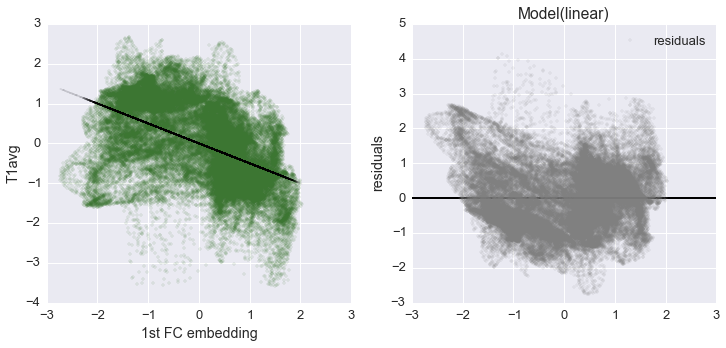

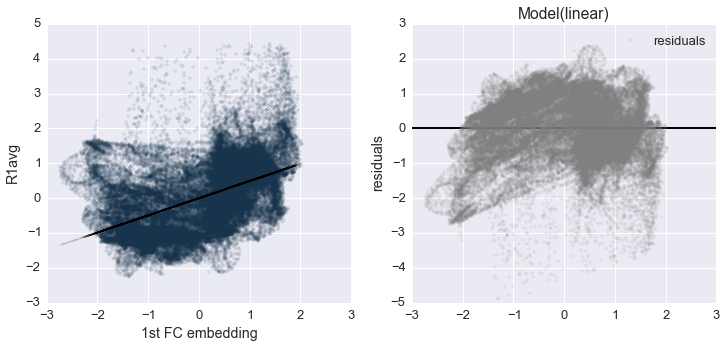

In [17]:
lin_mod = lmfit.models.LinearModel()

lin_t1 = fit_simple(lin_mod, 
                        x=embed1_t1_norm, y=t1_norm,
                        t1type='T1avg',
                        xlabel='1st FC embedding',
                        ylabel='T1avg', 
                        color=colors[3])


lin_r1 = fit_simple(lin_mod,
                        x=embed1_r1_norm, y=r1_norm,
                        t1type='R1avg',
                        xlabel='1st FC embedding',
                        ylabel='R1avg', 
                        color=colors[1])

### Quadratic fit

##### T1avg #####
[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # function evals   = 6
    # data points      = 64304
    # variables        = 3
    chi-square         = 42853.605
    reduced chi-square = 0.666
[[Variables]]
    a:  -0.29409154 +/- 0.003275 (1.11%) (init=-0.2940915)
    b:  -0.57992521 +/- 0.003340 (0.58%) (init=-0.5799252)
    c:   0.29409154 +/- 0.004592 (1.56%) (init= 0.2940915)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, c)                      = -0.713 
    C(a, b)                      =  0.266 
    C(b, c)                      = -0.190 

BIC -26060.4115697
AIC -26087.6257011

##### R1avg #####
[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # function evals   = 6
    # data points      = 64113
    # variables        = 3
    chi-square         = 43053.570
    reduced chi-square = 0.672
[[Variables]]
    a:   0.29833097 +/- 0.003292 (1.10%) (init= 0.298331)
    b:   0.57316111 +/- 0.003356 (0.59%) (init= 0.5731611)
    c:  -0.2983

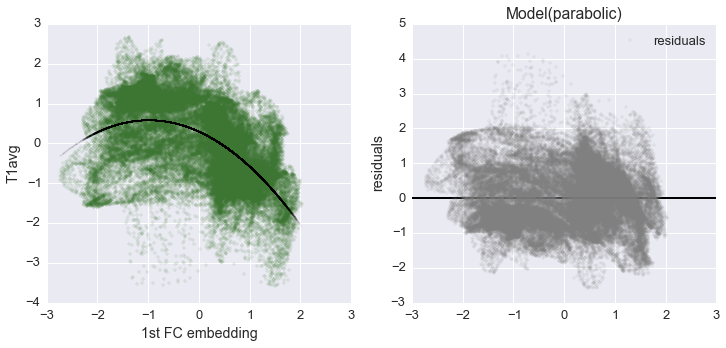

In [18]:
quad_mod = lmfit.models.QuadraticModel()

quad_t1 = fit_simple(quad_mod, 
                        x=embed1_t1_norm, y=t1_norm,
                        t1type='T1avg',
                        xlabel='1st FC embedding',
                        ylabel='T1avg', 
                        color=colors[3])


quad_r1 = fit_simple(quad_mod, 
                        x=embed1_r1_norm, y=r1_norm,
                        t1type='R1avg',
                        xlabel='1st FC embedding',
                        ylabel='R1avg', 
                        color=colors[1])

### Polynomial model degree=3

##### T1avg #####
[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # function evals   = 7
    # data points      = 64304
    # variables        = 4
    chi-square         = 40869.224
    reduced chi-square = 0.636
[[Variables]]
    c0:   0.27193141 +/- 0.004502 (1.66%) (init= 0.2719314)
    c1:  -0.87478061 +/- 0.006203 (0.71%) (init=-0.8747806)
    c2:  -0.23035701 +/- 0.003396 (1.47%) (init=-0.230357)
    c3:   0.15304604 +/- 0.002739 (1.79%) (init= 0.153046)
[[Correlations]] (unreported correlations are <  0.100)
    C(c1, c3)                    = -0.851 
    C(c0, c2)                    = -0.699 
    C(c2, c3)                    =  0.336 
    C(c1, c2)                    = -0.154 

BIC -29097.1508488
AIC -29133.4363573

##### R1avg #####
[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # function evals   = 7
    # data points      = 64113
    # variables        = 4
    chi-square         = 41494.229
    reduced chi-square = 0.647
[[Variables]]
    c0:  -0.27913955 +/- 0

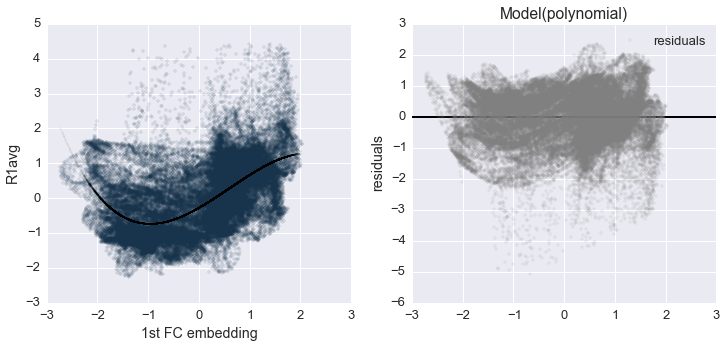

In [19]:
poly3_mod = lmfit.models.PolynomialModel(degree=3)

poly3_t1 = fit_simple(poly3_mod, 
                        x=embed1_t1_norm, y=t1_norm,
                        t1type='T1avg',
                        xlabel='1st FC embedding',
                        ylabel='T1avg', 
                        color=colors[3])


poly3_r1 = fit_simple(poly3_mod, 
                        x=embed1_r1_norm, y=r1_norm,
                        t1type='R1avg',
                        xlabel='1st FC embedding',
                        ylabel='R1avg', 
                        color=colors[1])

### Polynomial fit degree=4

##### T1avg #####
[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 64304
    # variables        = 5
    chi-square         = 40864.749
    reduced chi-square = 0.636
[[Variables]]
    c0:   0.26346095 +/- 0.005519 (2.09%) (init= 0.263461)
    c1:  -0.86628076 +/- 0.006981 (0.81%) (init=-0.8662808)
    c2:  -0.21010177 +/- 0.008354 (3.98%) (init=-0.2101018)
    c3:   0.14766675 +/- 0.003407 (2.31%) (init= 0.1476668)
    c4:  -0.00649410 +/- 0.002447 (37.68%) (init=-0.006494101)
[[Correlations]] (unreported correlations are <  0.100)
    C(c2, c4)                    = -0.914 
    C(c1, c3)                    = -0.880 
    C(c0, c2)                    = -0.760 
    C(c3, c4)                    =  0.595 
    C(c0, c4)                    =  0.578 
    C(c1, c4)                    = -0.459 
    C(c2, c3)                    = -0.434 
    C(c1, c2)                    =  0.364 
    C(c0, c3)                    =  0.286 
    C(c0, c1)        

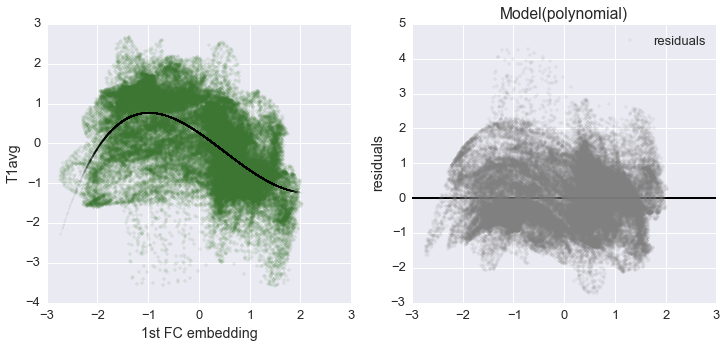

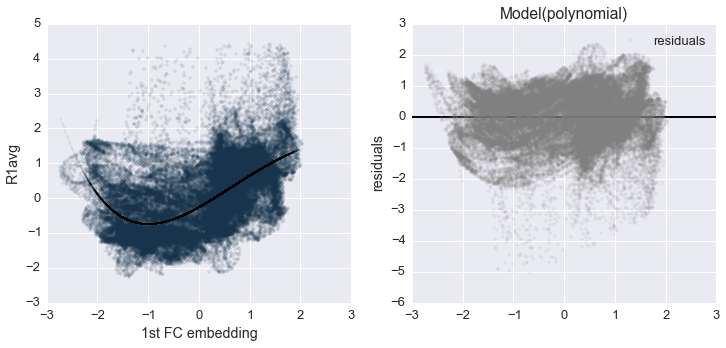

In [20]:
poly4_mod = lmfit.models.PolynomialModel(degree=4)

poly4_t1 = fit_simple(poly4_mod, 
                        x=embed1_t1_norm, y=t1_norm,
                        t1type='T1avg',
                        xlabel='1st FC embedding',
                        ylabel='T1avg', 
                        color=colors[3])


poly4_r1 = fit_simple(poly4_mod, 
                        x=embed1_r1_norm, y=r1_norm,
                        t1type='R1avg',
                        xlabel='1st FC embedding',
                        ylabel='R1avg', 
                        color=colors[1])

### Polynomial fit degree=5

##### T1avg #####
[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # function evals   = 9
    # data points      = 64304
    # variables        = 6
    chi-square         = 40678.734
    reduced chi-square = 0.633
[[Variables]]
    c0:   0.23867223 +/- 0.005693 (2.39%) (init= 0.2386722)
    c1:  -0.97331171 +/- 0.009353 (0.96%) (init=-0.9733117)
    c2:  -0.10357635 +/- 0.010395 (10.04%) (init=-0.1035764)
    c3:   0.28369625 +/- 0.008630 (3.04%) (init= 0.2836963)
    c4:  -0.04881543 +/- 0.003471 (7.11%) (init=-0.04881544)
    c5:  -0.03382675 +/- 0.001972 (5.83%) (init=-0.03382676)
[[Correlations]] (unreported correlations are <  0.100)
    C(c2, c4)                    = -0.940 
    C(c3, c5)                    = -0.919 
    C(c1, c3)                    = -0.872 
    C(c0, c2)                    = -0.741 
    C(c4, c5)                    =  0.711 
    C(c1, c5)                    =  0.667 
    C(c2, c5)                    = -0.598 
    C(c0, c4)                    =  0.574 
   

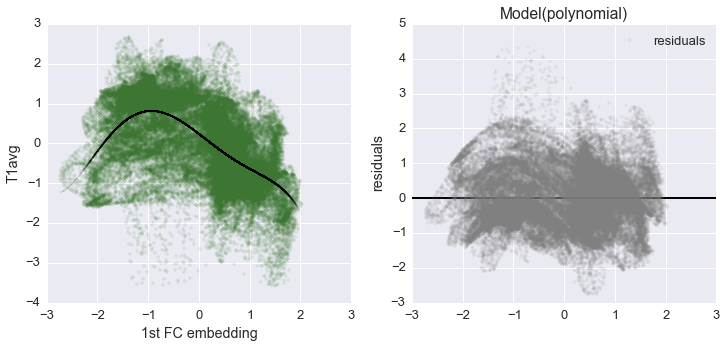

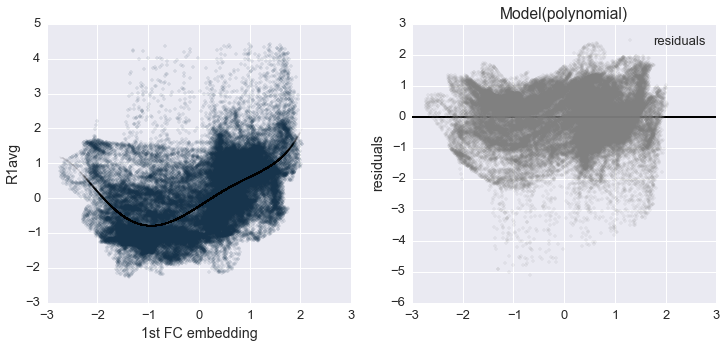

In [21]:
poly5_mod = lmfit.models.PolynomialModel(degree=5)

poly5_t1 = fit_simple(poly5_mod, 
                        x=embed1_t1_norm, y=t1_norm,
                        t1type='T1avg',
                        xlabel='1st FC embedding',
                        ylabel='T1avg', 
                        color=colors[3])


poly5_r1 = fit_simple(poly5_mod, 
                        x=embed1_r1_norm, y=r1_norm,
                        t1type='R1avg',
                        xlabel='1st FC embedding',
                        ylabel='R1avg', 
                        color=colors[1])

### Polynomial fit degree=6

##### T1avg #####
[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # function evals   = 10
    # data points      = 64304
    # variables        = 7
    chi-square         = 40671.578
    reduced chi-square = 0.633
[[Variables]]
    c0:   0.24794604 +/- 0.006325 (2.55%) (init= 0.247946)
    c1:  -0.99570792 +/- 0.011480 (1.15%) (init=-0.9957079)
    c2:  -0.13988784 +/- 0.014987 (10.71%) (init=-0.1398878)
    c3:   0.31731538 +/- 0.013206 (4.16%) (init= 0.3173154)
    c4:  -0.02121615 +/- 0.008910 (42.00%) (init=-0.02121616)
    c5:  -0.04302440 +/- 0.003371 (7.84%) (init=-0.0430244)
    c6:  -0.00549355 +/- 0.001633 (29.73%) (init=-0.005493557)
[[Correlations]] (unreported correlations are <  0.100)
    C(c3, c5)                    = -0.965 
    C(c4, c6)                    = -0.921 
    C(c2, c4)                    = -0.917 
    C(c1, c3)                    = -0.903 
    C(c5, c6)                    =  0.811 
    C(c1, c5)                    =  0.788 
    C(c0, c2)             

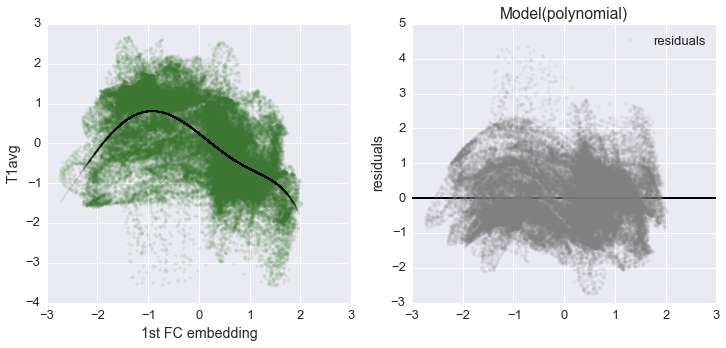

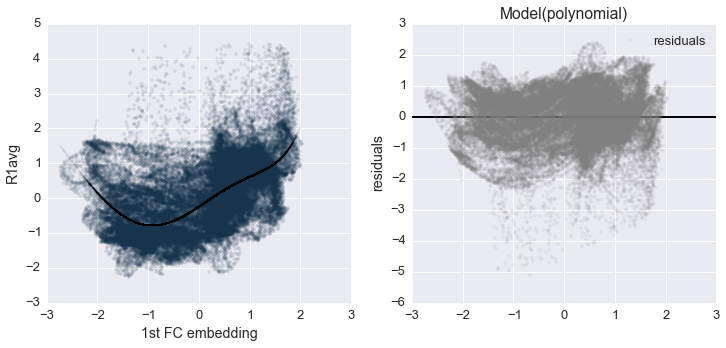

In [22]:
poly6_mod = lmfit.models.PolynomialModel(degree=6)

poly6_t1 = fit_simple(poly6_mod, 
                        x=embed1_t1_norm, y=t1_norm,
                        t1type='T1avg',
                        xlabel='1st FC embedding',
                        ylabel='T1avg', 
                        color=colors[3])


poly6_r1 = fit_simple(poly6_mod, 
                        x=embed1_r1_norm, y=r1_norm,
                        t1type='R1avg',
                        xlabel='1st FC embedding',
                        ylabel='R1avg', 
                        color=colors[1])

### Polynomial fit degree=7

##### T1avg #####
[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # function evals   = 11
    # data points      = 64304
    # variables        = 8
    chi-square         = 40487.087
    reduced chi-square = 0.630
[[Variables]]
    c0:   0.29062556 +/- 0.006785 (2.33%) (init= 0.2906256)
    c1:  -0.89108362 +/- 0.012983 (1.46%) (init=-0.8910836)
    c2:  -0.41185049 +/- 0.021818 (5.30%) (init=-0.4118505)
    c3:   0.08980929 +/- 0.018715 (20.84%) (init= 0.0898093)
    c4:   0.21716889 +/- 0.016522 (7.61%) (init= 0.2171689)
    c5:   0.09097798 +/- 0.008520 (9.37%) (init= 0.09097798)
    c6:  -0.05511621 +/- 0.003325 (6.03%) (init=-0.05511621)
    c7:  -0.02337863 +/- 0.001365 (5.84%) (init=-0.02337864)
[[Correlations]] (unreported correlations are <  0.100)
    C(c4, c6)                    = -0.978 
    C(c2, c4)                    = -0.952 
    C(c3, c5)                    = -0.921 
    C(c5, c7)                    = -0.919 
    C(c1, c3)                    = -0.895 
    C(c2, 

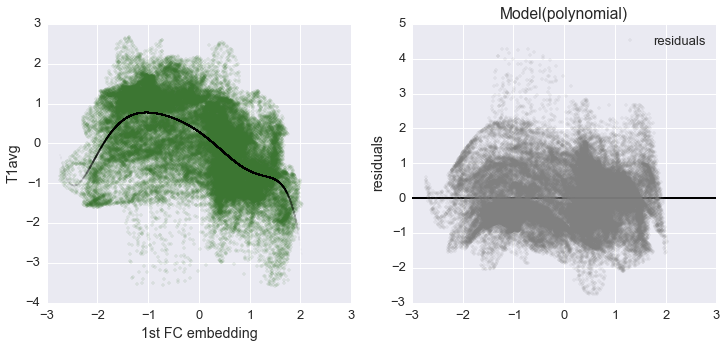

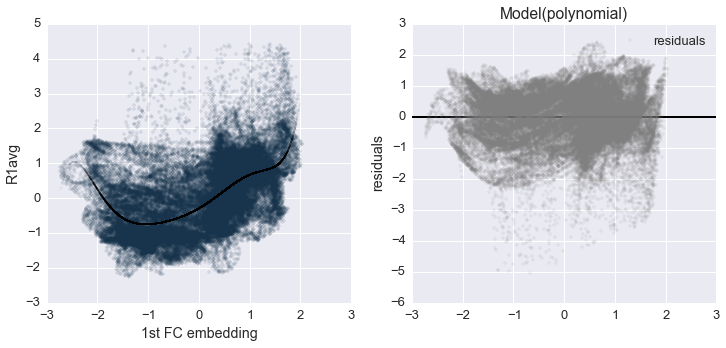

In [23]:
poly7_mod = lmfit.models.PolynomialModel(degree=7)

poly7_t1 = fit_simple(poly7_mod, 
                        x=embed1_t1_norm, y=t1_norm,
                        t1type='T1avg',
                        xlabel='1st FC embedding',
                        ylabel='T1avg', 
                        color=colors[3])


poly7_r1 = fit_simple(poly7_mod, 
                        x=embed1_r1_norm, y=r1_norm,
                        t1type='R1avg',
                        xlabel='1st FC embedding',
                        ylabel='R1avg', 
                        color=colors[1])

### Linear step function with constant

##### T1avg #####
[[Model]]
    (Model(step, form='linear') + Model(linear, prefix='const_'))
[[Fit Statistics]]
    # function evals   = 68
    # data points      = 64304
    # variables        = 4
    chi-square         = 43151.858
    reduced chi-square = 0.671
[[Variables]]
    const_slope:       0 (fixed)
    const_intercept:   0.57629554 +/- 0.005197 (0.90%) (init=-3.566171)
    amplitude:        -1.53231442 +/- 0.011467 (0.75%) (init= 6.243733)
    sigma:             1.51332700 +/- 0.020864 (1.38%) (init= 0.6797731)
    center:           -0.28130864 +/- 0.011618 (4.13%) (init=-0.3532069)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, center)             = -0.790 
    C(amplitude, sigma)          = -0.543 
    C(const_intercept, amplitude)  = -0.453 
    C(const_intercept, center)   = -0.442 
    C(const_intercept, sigma)    =  0.246 
    C(amplitude, center)         =  0.200 

BIC -25602.3459374
AIC -25638.6314459

##### R1avg #####
[[Model]]
    (Model(ste

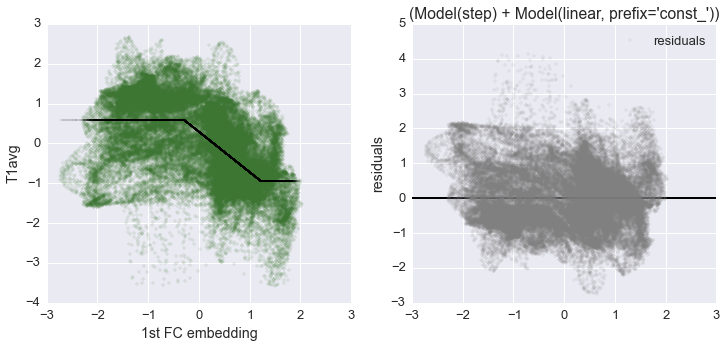

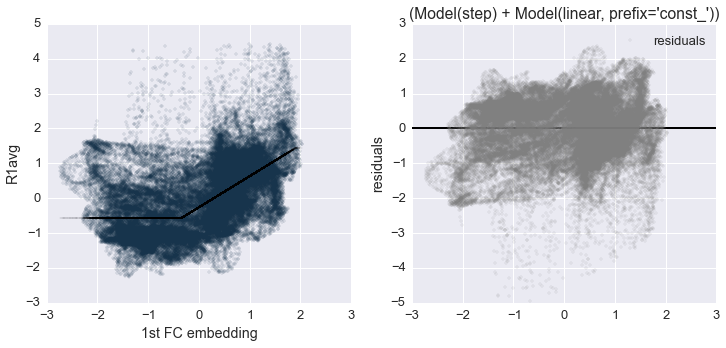

In [24]:
step_lin_mod = lmfit.models.StepModel(form='linear')

step_lin_const_t1 = fit_composite_const(step_lin_mod,
                                        x=embed1_t1_norm, y=t1_norm,
                                        t1type='T1avg',
                                        xlabel='1st FC embedding',
                                        ylabel='T1avg', 
                                        color=colors[3])

step_lin_const_r1 = fit_composite_const(step_lin_mod, 
                                        x=embed1_r1_norm, y=r1_norm,
                                        t1type='R1avg',
                                        xlabel='1st FC embedding',
                                        ylabel='R1avg', 
                                        color=colors[1])

### Arctan function + constant

##### T1avg #####
[[Model]]
    (Model(step, form='atan') + Model(linear, prefix='const_'))
[[Fit Statistics]]
    # function evals   = 80
    # data points      = 64304
    # variables        = 4
    chi-square         = 43565.368
    reduced chi-square = 0.678
[[Variables]]
    const_slope:       0 (fixed)
    const_intercept:   0.72684098 +/- 0.009401 (1.29%) (init=-3.566171)
    amplitude:        -1.81261955 +/- 0.022991 (1.27%) (init= 6.243733)
    sigma:             0.37924652 +/- 0.013126 (3.46%) (init= 0.6797731)
    center:            0.45478979 +/- 0.007057 (1.55%) (init=-0.3532069)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, sigma)          = -0.875 
    C(const_intercept, amplitude)  = -0.856 
    C(const_intercept, sigma)    =  0.797 
    C(amplitude, center)         = -0.399 
    C(sigma, center)             =  0.258 

BIC -24989.0754664
AIC -25025.3609749

##### R1avg #####
[[Model]]
    (Model(step, form='atan') + Model(linear, prefix='const

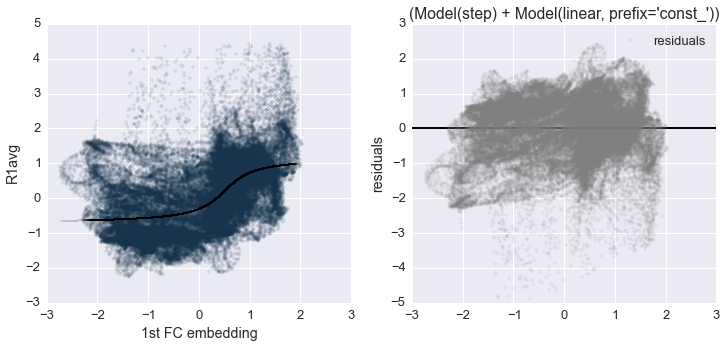

In [25]:
step_atan_mod = lmfit.models.StepModel(form='atan')

step_atan_const_t1 = fit_composite_const(step_atan_mod,
                                        x=embed1_t1_norm, y=t1_norm,
                                        t1type='T1avg',
                                        xlabel='1st FC embedding',
                                        ylabel='T1avg', 
                                        color=colors[3])

step_atan_const_r1 = fit_composite_const(step_atan_mod, 
                                        x=embed1_r1_norm, y=r1_norm,
                                        t1type='R1avg',
                                        xlabel='1st FC embedding',
                                        ylabel='R1avg', 
                                        color=colors[1])

### Logistic function + constant

##### T1avg #####
[[Model]]
    (Model(step, form='logistic') + Model(linear, prefix='const_'))
[[Fit Statistics]]
    # function evals   = 175
    # data points      = 64304
    # variables        = 4
    chi-square         = 43245.053
    reduced chi-square = 0.673
[[Variables]]
    const_slope:       0 (fixed)
    const_intercept:   0.59997138 +/- 0.006087 (1.01%) (init=-3.566171)
    amplitude:        -1.59719225 +/- 0.016482 (1.03%) (init= 6.243733)
    sigma:             0.31208855 +/- 0.007792 (2.50%) (init= 0.6797731)
    center:            0.48314764 +/- 0.008058 (1.67%) (init=-0.3532069)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, sigma)          = -0.791 
    C(const_intercept, amplitude)  = -0.599 
    C(amplitude, center)         = -0.549 
    C(const_intercept, sigma)    =  0.506 
    C(sigma, center)             =  0.374 
    C(const_intercept, center)   = -0.172 

BIC -25463.6178279
AIC -25499.9033364

##### R1avg #####
[[Model]]
    (Model(

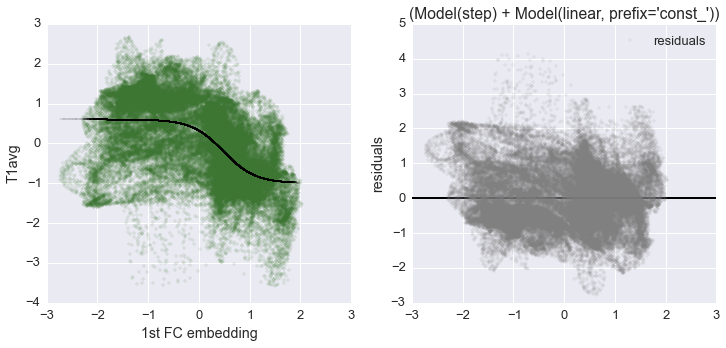

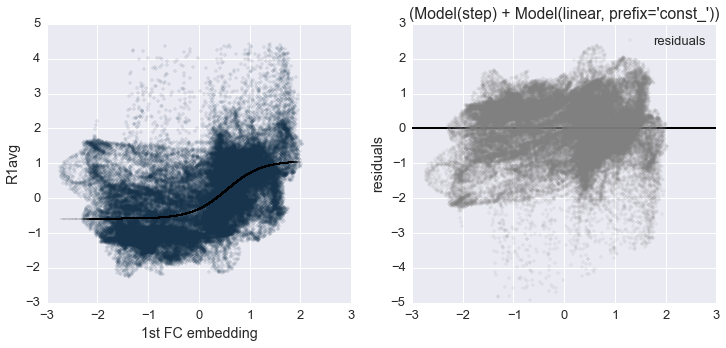

In [26]:
step_log_mod = lmfit.models.StepModel(form='logistic')

step_log_const_t1 = fit_composite_const(step_log_mod,
                                        x=embed1_t1_norm, y=t1_norm,
                                        t1type='T1avg',
                                        xlabel='1st FC embedding',
                                        ylabel='T1avg', 
                                        color=colors[3])

step_log_const_r1 = fit_composite_const(step_log_mod, 
                                        x=embed1_r1_norm, y=r1_norm,
                                        t1type='R1avg',
                                        xlabel='1st FC embedding',
                                        ylabel='R1avg', 
                                        color=colors[1])

### Error function + constant

##### T1avg #####
[[Model]]
    (Model(step, form='erf') + Model(linear, prefix='const_'))
[[Fit Statistics]]
    # function evals   = 84
    # data points      = 64304
    # variables        = 4
    chi-square         = 43173.560
    reduced chi-square = 0.671
[[Variables]]
    const_slope:       0 (fixed)
    const_intercept:   0.59274199 +/- 0.005828 (0.98%) (init=-3.566171)
    amplitude:        -1.60904066 +/- 0.016707 (1.04%) (init= 6.243733)
    sigma:             0.76187499 +/- 0.017580 (2.31%) (init= 0.6797731)
    center:            0.49979867 +/- 0.008824 (1.77%) (init=-0.3532069)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, sigma)          = -0.784 
    C(amplitude, center)         = -0.612 
    C(const_intercept, amplitude)  = -0.524 
    C(sigma, center)             =  0.434 
    C(const_intercept, sigma)    =  0.433 
    C(const_intercept, center)   = -0.191 

BIC -25570.0136201
AIC -25606.2991286

##### R1avg #####
[[Model]]
    (Model(step, 

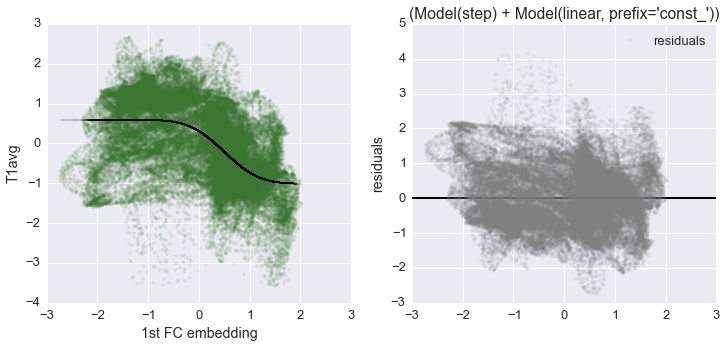

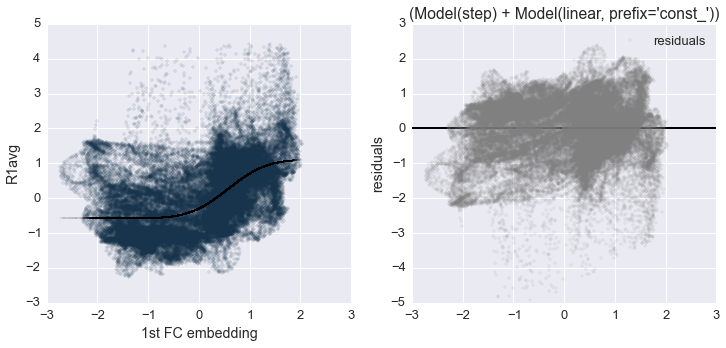

In [27]:
step_erf_mod = lmfit.models.StepModel(form='erf')

step_erf_const_t1 = fit_composite_const(step_erf_mod,
                                        x=embed1_t1_norm, y=t1_norm,
                                        t1type='T1avg',
                                        xlabel='1st FC embedding',
                                        ylabel='T1avg', 
                                        color=colors[3])

step_erf_const_r1 = fit_composite_const(step_erf_mod, 
                                        x=embed1_r1_norm, y=r1_norm,
                                        t1type='R1avg',
                                        xlabel='1st FC embedding',
                                        ylabel='R1avg', 
                                        color=colors[1])

### Compare different models

In [28]:
import scipy.stats as stats

In [29]:
names = ['linear', 'quadratic', 'poly3', 'poly4', 'poly5', 'poly6', 'poly7', 
         'step lin', 'step atan', 'step log', 'step erf']

t1_results = [lin_t1, quad_t1, poly3_t1, poly4_t1, poly5_t1, poly6_t1, poly7_t1, 
                     step_lin_const_t1, step_atan_const_t1, step_log_const_t1, step_erf_const_t1]

r1_results = [lin_r1, quad_r1, poly3_r1, poly4_r1, poly5_r1, poly6_r1, poly7_r1, 
                     step_lin_const_r1, step_atan_const_r1, step_log_const_r1, step_erf_const_r1]

df = pd.DataFrame()

df['Value']=[m.bic for m in t1_results]+[m.aic for m in t1_results]+[m.bic for m in r1_results]+[m.aic for m in r1_results]
df['Model']=4*names
df['Criterion']=len(t1_results)*['BIC T1']+len(t1_results)*['AIC T1']+len(r1_results)*['BIC R1']+len(r1_results)*['AIC R1']


df2 = pd.DataFrame()

df2['Model'] = 2*names
df2['Datatype'] = len(names)*['T1']+len(names)*['R1']
df2['Corr'] = [stats.pearsonr(m.best_fit, t1_norm)[0] for m in t1_results] + [stats.pearsonr(m.best_fit, r1_norm)[0] for m in r1_results]

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


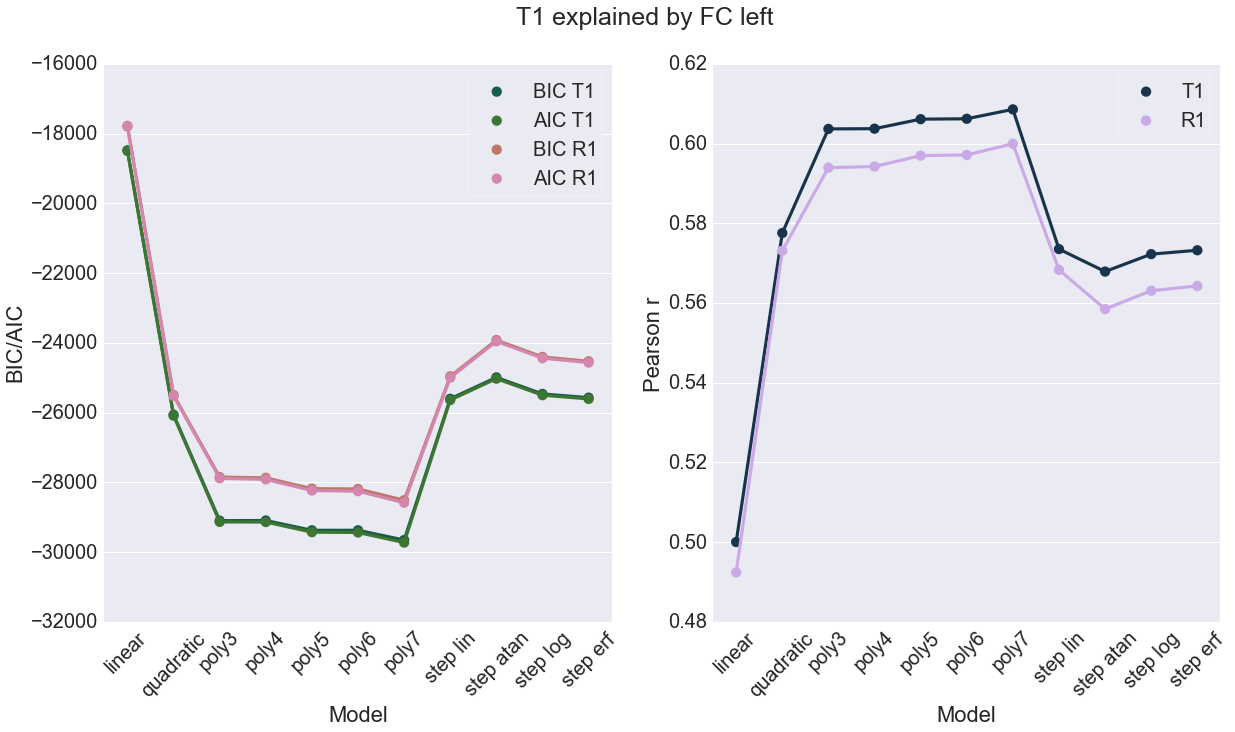

In [30]:
sns.set_context('notebook', font_scale=2)

fig=plt.figure(figsize=(20,10))
fig.add_subplot(121)
#sns.barplot(data=df, y='Model', x='Value', hue='Criterion', 
#            palette=[colors[2], colors[3], colors[5], colors[6]])
sns.pointplot(data=df, x='Model', y='Value', hue='Criterion', linestyles='-',
             palette=[colors[2], colors[3], colors[5], colors[6]])
plt.legend(loc=0, frameon=True)
plt.ylabel('BIC/AIC')
plt.xticks(rotation=45)

fig.add_subplot(122)
#sns.barplot(data=df2, y='Model', x='Reduced Chi', hue='Datatype', 
#            palette=[colors[3], colors[5]])
sns.pointplot(data=df2, x='Model', y='Corr', hue='Datatype', 
           palette=[colors[1], colors[7]])
plt.legend(loc=0, frameon=True)
plt.ylabel('Pearson r')
plt.xticks(rotation=45);

if hemi=='lh':
    hemistring='left'
elif hemi=='rh':
    hemistring='right'
else:
    hemistring='both'
plt.suptitle('T1 explained by FC %s'%hemistring, fontsize=25)

In [31]:
t1_df = pd.DataFrame()
t1_df['Model']=names
t1_df['T1 BIC']=[m.bic for m in t1_results]
t1_df['T1 AIC']=[m.bic for m in t1_results]
t1_df

Model        T1 BIC        T1 AIC
0      linear -18478.079423 -18478.079423
1   quadratic -26060.411570 -26060.411570
2       poly3 -29097.150849 -29097.150849
3       poly4 -29092.121102 -29092.121102
4       poly5 -29373.427256 -29373.427256
5       poly6 -29372.667801 -29372.667801
6       poly7 -29652.950831 -29652.950831
7    step lin -25602.345937 -25602.345937
8   step atan -24989.075466 -24989.075466
9    step log -25463.617828 -25463.617828
10   step erf -25570.013620 -25570.013620

In [32]:
r1_df = pd.DataFrame()
r1_df['Model']=names
r1_df['R1 BIC']=[m.bic for m in r1_results]
r1_df['R1 AIC']=[m.bic for m in r1_results]
r1_df

Model        R1 BIC        R1 AIC
0      linear -17778.442445 -17778.442445
1   quadratic -25493.719318 -25493.719318
2       poly3 -27846.831040 -27846.831040
3       poly4 -27869.527793 -27869.527793
4       poly5 -28179.245066 -28179.245066
5       poly6 -28188.673092 -28188.673092
6       poly7 -28511.084252 -28511.084252
7    step lin -24960.244489 -24960.244489
8   step atan -23919.274484 -23919.274484
9    step log -24402.385553 -24402.385553
10   step erf -24528.252227 -24528.252227